# **Data Analysis Workflow**


## Data Preparation Phase

In [1]:
# Acquaring data from the .csv file and loading the dataset into a DataFrame.
import pandas as pd

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**1. Identifying and Removing Duplicates from the Dataset**


In [2]:
# Using duplicated() method to idendity duplicates and drop_duplicates() method to remove them from the dataset.
duplicates = df[df.duplicated(keep=False)]

#counting the number of duplicate rows
number_of_duplicates = df.duplicated().sum()
print(f'Number of duplicated rows: {number_of_duplicates}')

df = df.drop_duplicates(keep='first')
df

Number of duplicated rows: 10


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


**2. Identifying and Handling Missing Values**


In [3]:
#identifying missing values
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
#print(list(missing_values.items()))

#imputing NaN or missing values with the most frequent value using mode() method
df.loc[:, 'Country'] = df['Country'].fillna(df['Country'].mode()[0])
df.loc[:, 'Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
df.loc[:, 'EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])
df.loc[:, 'ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean())
print(df.isnull().sum())
#imputing 'Currency' column based on 'Country' column
mode_currency_by_country = df.groupby('Country')['Currency'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
df['Currency'] = df.apply(lambda row: mode_currency_by_country[row['Country']] 
                          if pd.isnull(row['Currency']) 
                          else row['Currency'], axis=1)
grouped_CC = df.groupby(['Country','Currency']).size().reset_index(name='Count')
print(grouped_CC)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly        0
JobSat                 36311
Length: 114, dtype: int64
         Country                           Currency  Count
0    Afghanistan    AED United Arab Emirates dirham     11
1    Afghanistan                AFN\tAfghan afghani     38
2    Afghanistan                 AMD\tArmenian dram      1
3    Afghanistan  ANG Netherlands Antillean guilder      1
4    Afghanistan                BHD\tBahraini dinar      1
..           ...                                ...    ...
588        Yemen                   YER\tYemeni rial     13
589       Zambia                  EUR European Euro      1
590       Zambia          USD\tUnited States dollar      1
591       Zambia                 ZMW Zambian kwacha     13
592   

**3. Normalization Methods (Showcasing Skills)**

In [4]:
# The following code demonstrates how to perform normalization using Z-Score and Min-Max methods.
# These are not applied in the analysis because the 'ConvertedCompYearly' column is already normalized.

#Z-score Normalization
#calculating the mean() and std() of the 'ConvertedCompYearly' column for the Z-Score Normalization
mean = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()
df.loc[:, 'Normalized_Compensation_Z'] = (df['ConvertedCompYearly'] - mean) / std
print(f"Z-Score Normalization:\n{df['Normalized_Compensation_Z']}")

#Min-Max Scaling
#calculating the min() and max() of the 'ConvertedCompYearly' column for the Min-Max Scaling
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()
df.loc[:, 'Normalized_Compensation_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)
print(f'Min-Max Scaling:\n{df['Normalized_Compensation_MinMax']}')

Z-Score Normalization:
0        1.302052e-16
1        1.302052e-16
2        1.302052e-16
3        1.302052e-16
4        1.302052e-16
             ...     
65432    1.302052e-16
65433    1.302052e-16
65434    1.302052e-16
65435    1.302052e-16
65436    1.302052e-16
Name: Normalized_Compensation_Z, Length: 65437, dtype: float64
Min-Max Scaling:
0        0.0053
1        0.0053
2        0.0053
3        0.0053
4        0.0053
          ...  
65432    0.0053
65433    0.0053
65434    0.0053
65435    0.0053
65436    0.0053
Name: Normalized_Compensation_MinMax, Length: 65437, dtype: float64


**4. Detecting and Visualizing Outliers**

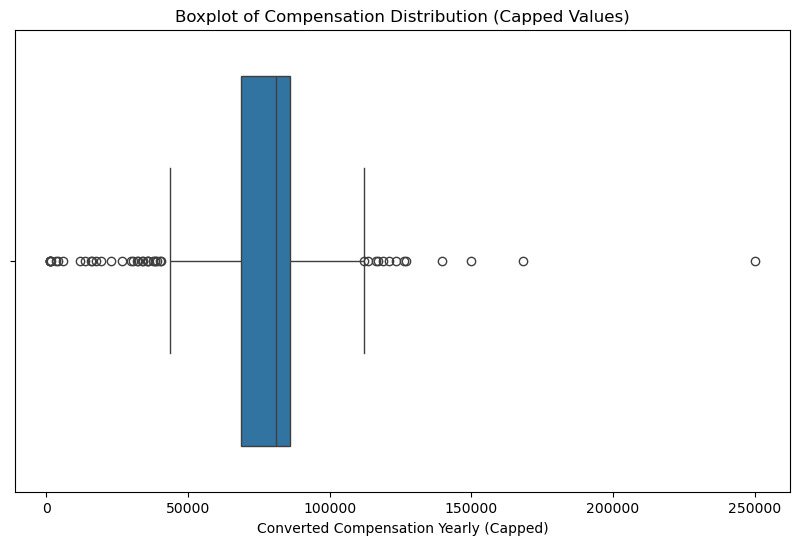

Outliers detected:
ResponseId                        23435
MainBranch                        23435
Age                               23435
Employment                        23435
RemoteWork                        23427
                                  ...  
SurveyEase                        23184
ConvertedCompYearly               23435
JobSat                            16075
Normalized_Compensation_Z         23435
Normalized_Compensation_MinMax    23435
Length: 116, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
a = Q1 - 1.5 * IQR
b = Q3 + 1.5 * IQR

# Defining outliers
outliers = df[(df['ConvertedCompYearly'] < a) | (df['ConvertedCompYearly'] > b)]

# Capping the outliers
upper_limit = df['ConvertedCompYearly'].quantile(0.99)  
lower_limit = df['ConvertedCompYearly'].quantile(0.01)  
df.loc[:, 'Capped_ConvertedCompYearly'] = df.loc[:, 'ConvertedCompYearly'].clip(lower=lower_limit, upper=upper_limit)

# Group the data by Age and Country and calculate mean capped compensation
grouped_data_AG = df.groupby(['Age', 'Country'])['Capped_ConvertedCompYearly'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_data_AG, x='Capped_ConvertedCompYearly') 
plt.title('Boxplot of Compensation Distribution (Capped Values)')
plt.xlabel('Converted Compensation Yearly (Capped)')
plt.show()

print("Outliers detected:")
print(outliers.count())


## Data Analytics Framework Phase

**1. Descriptive Analysis of Compensation**

In [6]:
#summarizing and comparing avarage across categories

#Education Level Compensation Analysis
#describing average compensation varies across different education levels
edu_comp_analysis = df.groupby('EdLevel')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

#Country Compensation Analysis
#comparing average compensation by country
country_comp_analysis = df.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

#Main Branch Compensation Analysis
#highlighting differences in average compensation based on respondents’ main job branches
branch_comp_analysis = df.groupby('MainBranch')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

#Comparative Industry Compensation Analysis
#identifying industries with the highest and lowest average compensation
indust_comp_analysis = df.groupby('Industry')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

#Age-Based Compensation Analysis
#showing average compensation changes across age groups
age_comp_analysis = df.groupby('Age')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

remote_vs_inperson = df.groupby('RemoteWork')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

print(edu_comp_analysis)
print(country_comp_analysis)
print(branch_comp_analysis)
print(indust_comp_analysis)
print(age_comp_analysis)
print(remote_vs_inperson)

#all unique values and their counts in the 'Age' Column
age_counts = df['Age'].value_counts()
print(age_counts)

age_edu_analysis = df.groupby(['Age','EdLevel']).size().reset_index(name='Counts')
print(age_edu_analysis)

                                             EdLevel  ConvertedCompYearly
0     Professional degree (JD, MD, Ph.D, Ed.D, etc.)        102564.790364
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         86968.480049
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         85966.758479
3                          Primary/elementary school         83535.748670
4  Some college/university study without earning ...         83512.017059
5                                     Something else         82154.719625
6                Associate degree (A.A., A.S., etc.)         81892.571453
7  Secondary school (e.g. American high school, G...         80066.474488
                      Country  ConvertedCompYearly
0                       Gabon        564616.465447
1                    Ethiopia        354819.996296
2                South Africa        107466.358776
3    United States of America        106061.379495
4                   Singapore        101690.514384
..                        ..

In [7]:
# Deleting rows which fill out the 'Under 18 years old' data in order to get a meaningful and accurate visualization.
df = df[df['Age'] != 'Under 18 years old']
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Normalized_Compensation_Z,Normalized_Compensation_MinMax,Capped_ConvertedCompYearly
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,Too long,Neither easy nor difficult,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN,1.302052e-16,0.0053,86155.287263
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN,1.302052e-16,0.0053,86155.287263


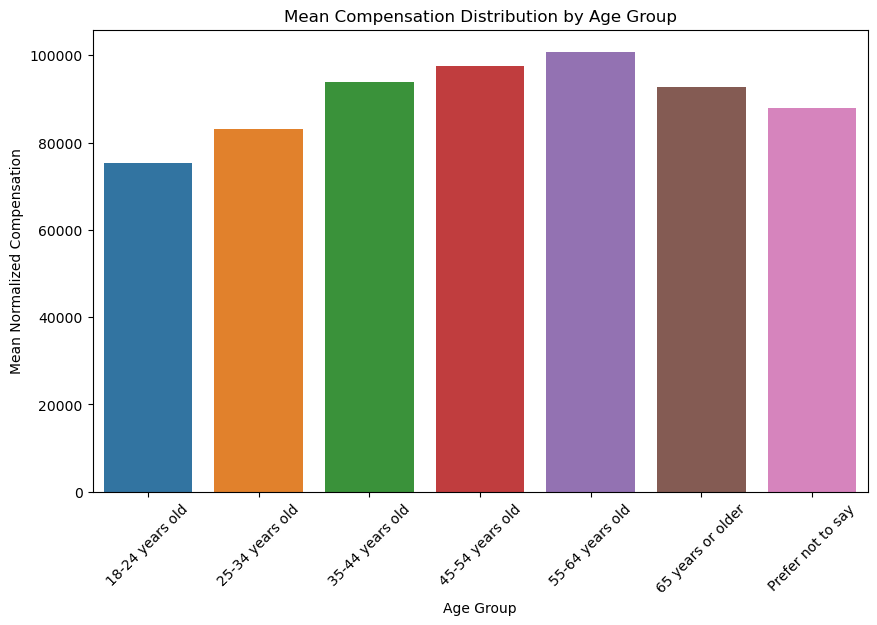

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Age and calculate mean compensation.
grouped_data = df.groupby('Age')['ConvertedCompYearly'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Age', y='ConvertedCompYearly', hue = 'Age', legend=False)
plt.title('Mean Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Normalized Compensation')
plt.xticks(rotation=45)
plt.show()

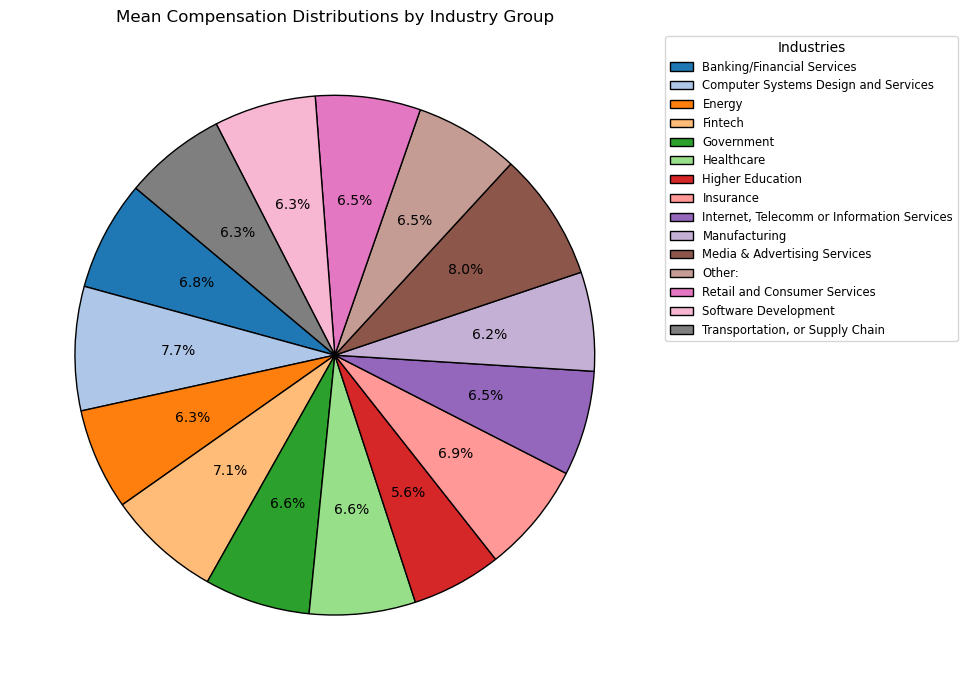

In [11]:
# Group the data by Industry and calculate mean compensation.
grouped_data_I = df.groupby('Industry')['ConvertedCompYearly'].mean().reset_index()

plt.figure(figsize=(11, 7))
plt.pie(
    grouped_data_I['ConvertedCompYearly'],  
    autopct='%1.1f%%',  # Displaying percentages
    startangle=140,  # Rotate start angle for better layout
    colors=plt.cm.tab20.colors[:len(grouped_data_I)], 
    wedgeprops={'edgecolor': 'black'} 
)
plt.legend(
    grouped_data_I['Industry'], 
    title='Industries', 
    loc='best', 
    bbox_to_anchor=(1, 1),  # Place the legend outside the chart
    fontsize='small'
)

plt.title('Mean Compensation Distributions by Industry Group')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**2. Diagnostic Analysis**

Compensation statistics:
count    6.286900e+04
mean     8.622335e+04
std      1.139939e+05
min      1.000000e+00
25%      8.615529e+04
50%      8.615529e+04
75%      8.615529e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


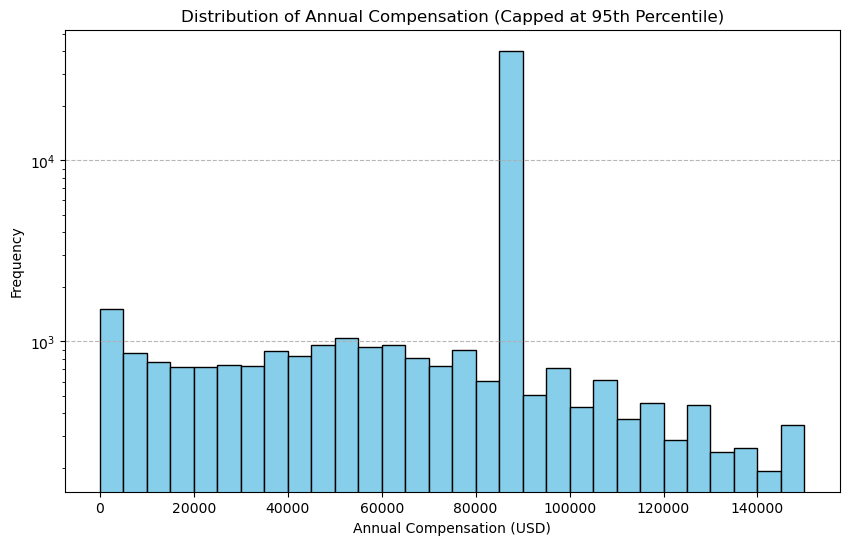

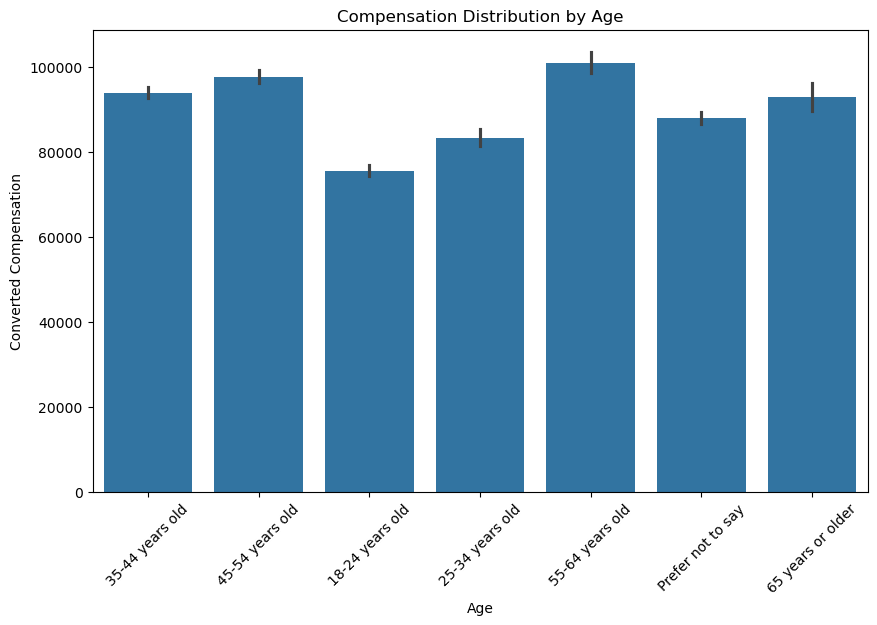

In [12]:
# Getting the basic statistics
comp_stats = df['ConvertedCompYearly'].describe()
print("Compensation statistics:")
print(comp_stats)

# Visualizizng with histogram and capped outliers.
cap = df['ConvertedCompYearly'].quantile(0.95)  # Cap at 95th percentile
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'][df['ConvertedCompYearly'] <= cap], bins=30, color='skyblue', edgecolor='black', log=True)
plt.title('Distribution of Annual Compensation (Capped at 95th Percentile)')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

# Bar Plot for Education Level vs. Compensation
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='ConvertedCompYearly', data=df)
plt.title('Compensation Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Converted Compensation')
plt.xticks(rotation=45)
plt.show()

Coefficients: [  7011.14466057  17423.51593536  21304.85142081  24475.0569321
  15952.22554465  11855.36377703   6407.88532008   2238.82885745
   4219.15977112  16614.24083569   2728.75566461   2621.99991925
   2046.57174995  11610.20616954  -7217.37747338   3814.82048275
  -5628.13513874  -4114.06019    -19361.35076722   -190.05244067
  -4364.79938556  -9484.94412642  15481.81155857  -4379.04474405
  -3883.40102586  -5162.50991367  -6003.95800315]
Intercept: 75636.89262515299


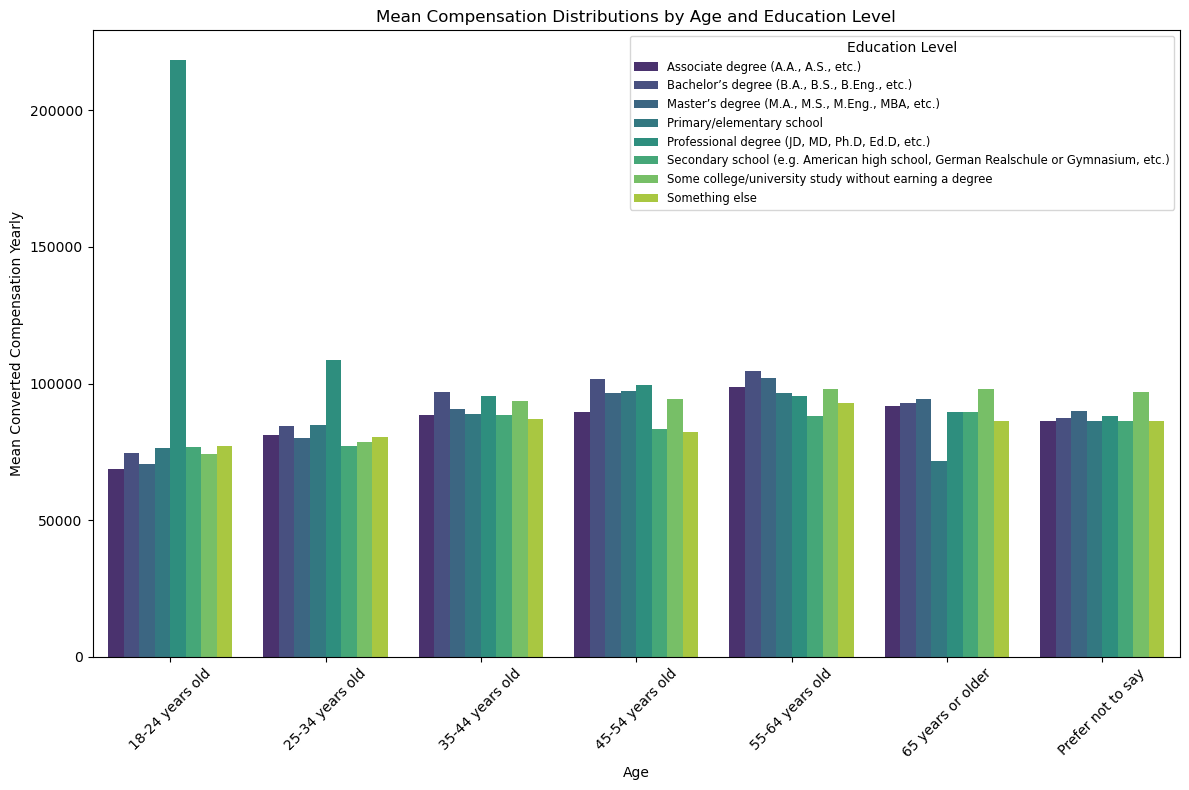

In [13]:
from sklearn.linear_model import LinearRegression

X_ = pd.get_dummies(df[['Age', 'EdLevel', 'Industry']], drop_first=True)
y = df['ConvertedCompYearly']

model = LinearRegression()
model.fit(X_,y)

#the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Group data by Age, EdLevel, and calculate the mean of ConvertedCompYearly.
grouped_AEC = df.groupby(['Age', 'EdLevel'])['ConvertedCompYearly'].mean().reset_index()

# Barplot with hue for EdLevel
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Age', 
    y='ConvertedCompYearly', 
    hue='EdLevel', 
    data=grouped_AEC, 
    palette='viridis'
)

# Add titles and format x-axis for better readability
plt.title('Mean Compensation Distributions by Age and Education Level')
plt.xlabel('Age')
plt.ylabel('Mean Converted Compensation Yearly')
plt.xticks(rotation=45)
plt.legend(title='Education Level', loc='best', bbox_to_anchor=(1,1), fontsize='small')
plt.tight_layout()  # Ensures proper spacing
plt.show()

**Inferential Analysis**

T-statistic: 6.36338192383409, P-value: 2.0342248282425447e-10


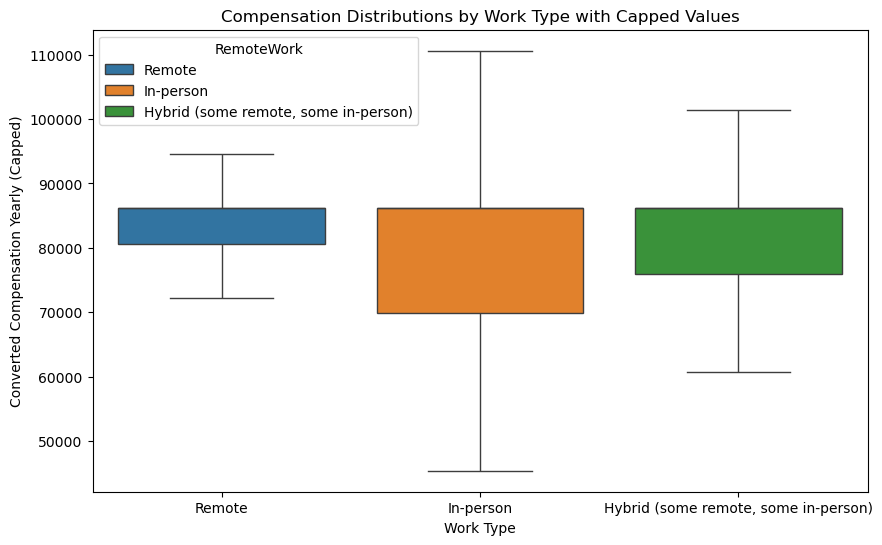

In [14]:
from scipy.stats import ttest_ind
remote_vs_inperson = df.groupby('RemoteWork')['ConvertedCompYearly'].mean().sort_values(ascending=False).reset_index()

remote_comp = df[df['RemoteWork'] == 'Remote']['ConvertedCompYearly'].dropna()
inperson_comp = df[df['RemoteWork'] == 'In-person']['ConvertedCompYearly'].dropna()

t_stat, p_value = ttest_ind(remote_comp, inperson_comp, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


import seaborn as sns
import matplotlib.pyplot as plt

# Capping outliers at the 99th percentile for 'ConvertedCompYearly'
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
lower_limit = df['ConvertedCompYearly'].quantile(0.01)

# Applying capping
df.loc[:, 'Capped_ConvertedCompYearly'] = df.loc[:, 'ConvertedCompYearly'].clip(lower=lower_limit, upper=upper_limit)

# Plotting the boxplot with capped values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='RemoteWork', y='Capped_ConvertedCompYearly', hue='RemoteWork', showfliers=False)
plt.title('Compensation Distributions by Work Type with Capped Values')
plt.ylabel('Converted Compensation Yearly (Capped)')
plt.xlabel('Work Type')
plt.show()


F-statistic: 5.703572280086456, P-value: 3.072693161747477e-11


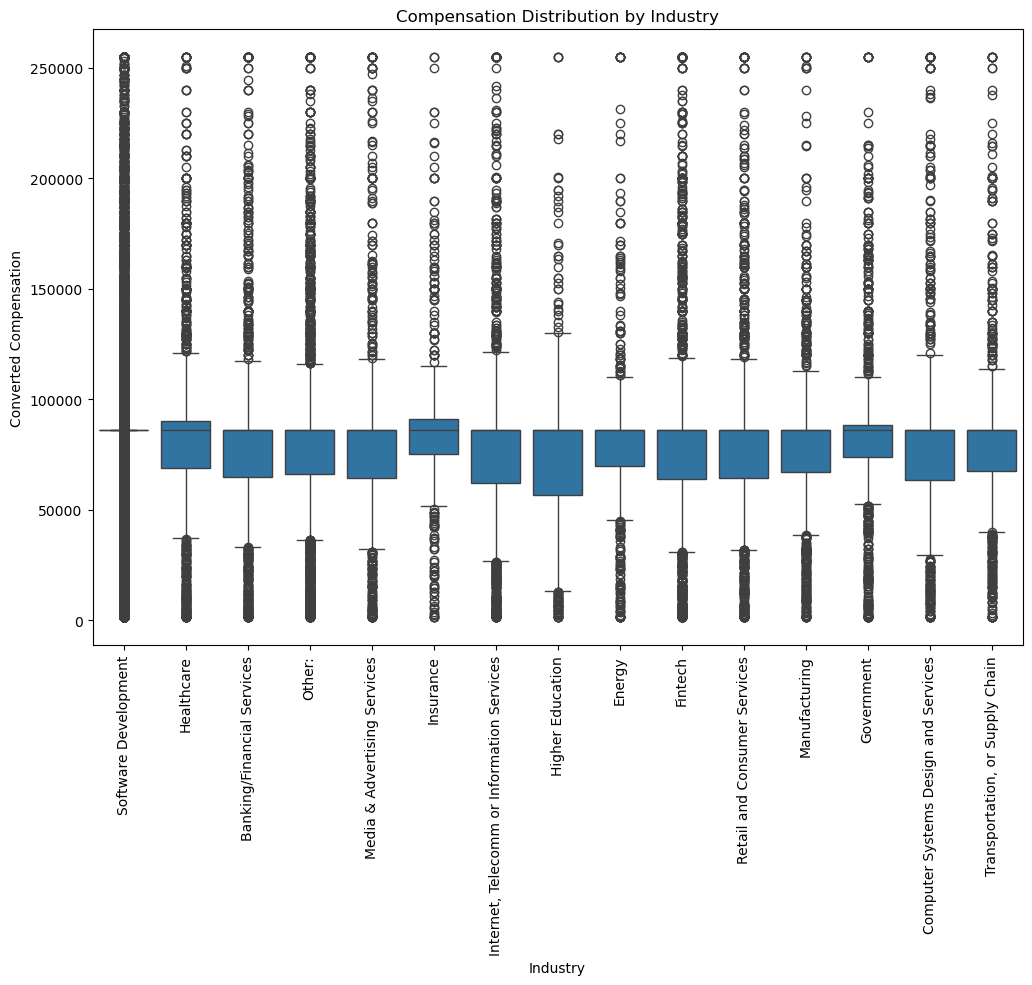

In [15]:
#ANOVA for Comparing Compensation Across Multiple Groups
from scipy.stats import f_oneway

f_stat, p_value1 = f_oneway(*[group['ConvertedCompYearly'].dropna() for _, group in df.groupby('Industry')])
print(f"F-statistic: {f_stat}, P-value: {p_value1}")

# Group the data by Industry and calculate mean compensation.
# Capping outliers at the 99th percentile for 'ConvertedCompYearly'
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
lower_limit = df['ConvertedCompYearly'].quantile(0.01)

# Applying capping
df.loc[:, 'Capped_ConvertedCompYearly'] = df.loc[:, 'ConvertedCompYearly'].clip(lower=lower_limit, upper=upper_limit)

# Plotting the boxplot with capped values
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Industry', y='Capped_ConvertedCompYearly')
plt.title('Compensation Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Converted Compensation')
plt.xticks(rotation=90)
plt.show()

In [16]:
#Chi-Square Test for Compensation Analysis (Categorical Variables)
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['EdLevel'], df['Industry'])
chi2_stat, p_value2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value2}")


Chi-square statistic: 1384.1688741379585, P-value: 4.970972719524069e-226


In [17]:
#Independent T-test
from scipy.stats import ttest_ind

industry_A = df[df['Industry'] == 'Software Development']['ConvertedCompYearly'].dropna()
industry_B = df[df['Industry'] == 'Insurance']['ConvertedCompYearly'].dropna()
t_stat, p_value3 = ttest_ind(industry_A, industry_B)
print(f"T-statistic: {t_stat}, P-value: {p_value3}")

T-statistic: -1.3831709789834503, P-value: 0.16661910866573107


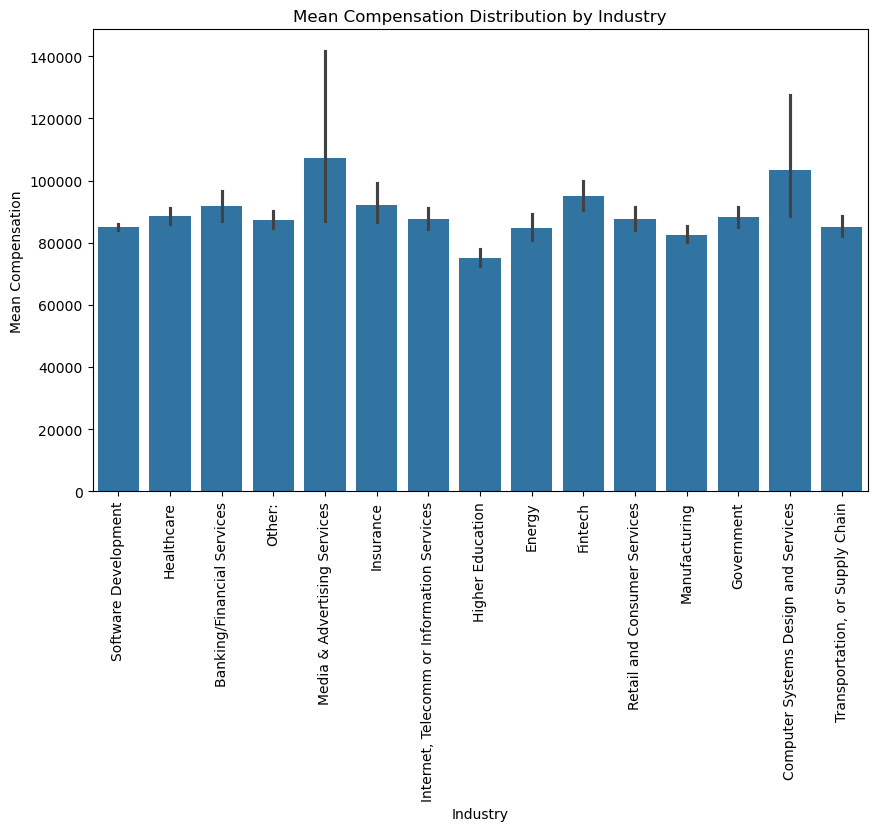

In [18]:
# Bar chart for mean compensation by industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='ConvertedCompYearly', data=df)
plt.xticks(rotation=90)
plt.title('Mean Compensation Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Mean Compensation')
plt.show()

**Predictive Analysis**

RMSE: 33878.03825092361


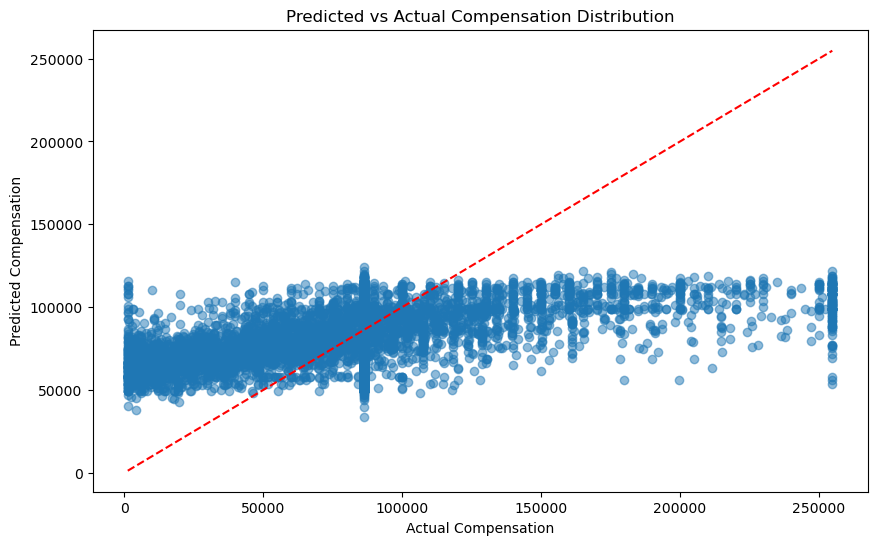

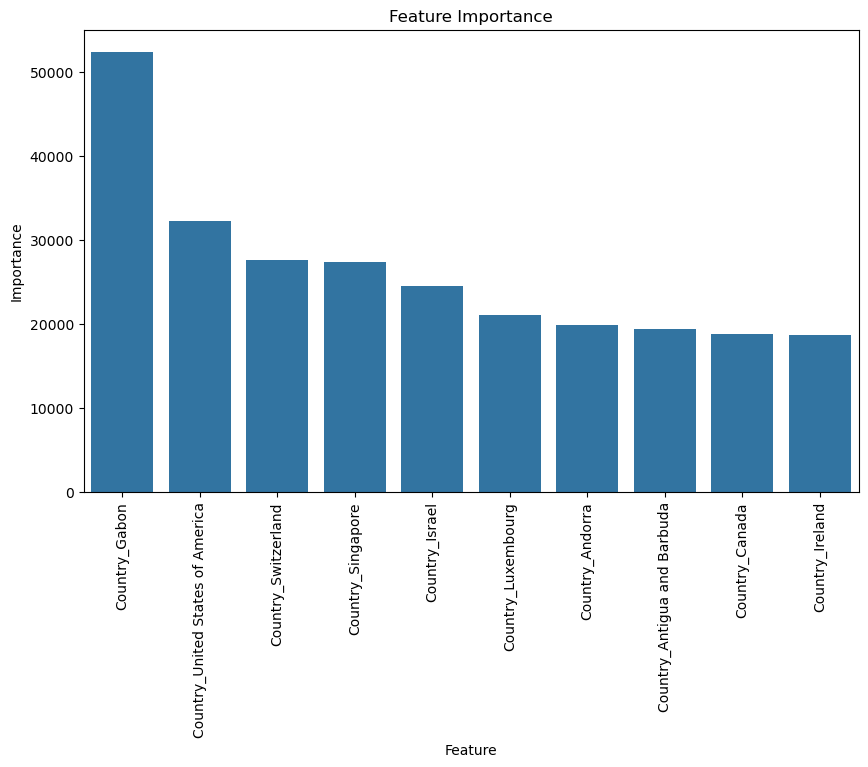

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

#preparing data
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Age', 'EdLevel', 'Industry', 'Country'])
X = pd.get_dummies(df_clean[['Age', 'EdLevel', 'Industry', 'Country']], drop_first=True)
y = df_clean['Capped_ConvertedCompYearly']

# Cap target variable
upper_limit = df_clean['ConvertedCompYearly'].quantile(0.69)
df_clean['Capped_ConvertedCompYearly'] = df_clean['ConvertedCompYearly'].clip(upper=upper_limit)

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")

# Scatter plot for Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=1.5)
plt.title('Predicted vs Actual Compensation Distribution')
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.show()

# Feature importance for Ridge Regression.
importances = model.coef_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizing only the top 10 features by importance.
top_features = feature_importance.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=top_features)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()
